In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

file_path = '/kaggle/input/monthly-container-holding-of-ports-in-south-korea/container.csv'
data = pd.read_csv(file_path)

# 2. Preprocessing Data

In [68]:
# 2. Transformasi Data
# Tambahkan kolom kapasitas TEU berdasarkan format TEU: 10ft=0.5, 20ft=1, 40ft=2
TEU_CONVERSION = {
    'Full_10': 0.5, 'Empty_10': 0.5,
    'Full_20': 1, 'Empty_20': 1,
    'Full_40': 2, 'Empty_40': 2,
    'Full_other': 1, 'Empty_other': 1
}

data['Capacity'] = sum(data[col] * factor for col, factor in TEU_CONVERSION.items())

# Extract Tahun dan Bulan dari kolom 'Date'
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

data.rename(columns={'Harbor': 'Port Name'}, inplace=True)

# Kolom utama
transformed_data = data[['Port Name', 'Year', 'Month', 'Capacity']]
transformed_data

,Port Name,Year,Month,Capacity
0,Busan,2018,1,224682.0
1,Busan,2018,1,1467610.0
2,Busan,2018,2,209302.5
3,Busan,2018,2,1452984.5
4,Busan,2018,3,224071.0
...,...,...,...,...
691,Ulsan,2020,3,30142.0
692,Ulsan,2020,4,12228.0
693,Ulsan,2020,4,29578.0
694,Ulsan,2020,5,14286.0


# 3. Hitung Rata-rata Kapasitas per Tahun per Pelabuhan

In [69]:
average_capacity = (
    transformed_data.groupby(['Port Name', 'Year'])['Capacity']
    .mean()
    .reset_index()
    .rename(columns={'Capacity': 'Average Capacity (TEU)'})
)

average_capacity

,Port Name,Year,Average Capacity (TEU)
0,Busan,2018,899658.166667
1,Busan,2019,913452.791667
2,Busan,2020,897098.850000
3,Daesan,2018,3783.958333
4,Daesan,2019,3077.916667
5,Daesan,2020,4299.600000
6,"East Sea, Mukho",2018,81.666667
7,"East Sea, Mukho",2019,77.458333
8,"East Sea, Mukho",2020,0.000000
9,Gunsan,2018,3341.583333


# 4. Identifikasi Pelabuhan dengan Kapasitas Rata-rata Tertinggi per Tahun

In [70]:
highest_capacity = (
    average_capacity.loc[average_capacity.groupby('Year')['Average Capacity (TEU)'].idxmax()]
    .reset_index(drop=True)
)
highest_capacity.rename(columns={'Port Name': 'Top Port'}, inplace=True)
highest_capacity


,Top Port,Year,Average Capacity (TEU)
0,Busan,2018,899658.166667
1,Busan,2019,913452.791667
2,Busan,2020,897098.850000


/tmp/ipykernel_24/3223541584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['date'] = pd.to_datetime(transformed_data[['Year', 'Month']].assign(DAY=1))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore

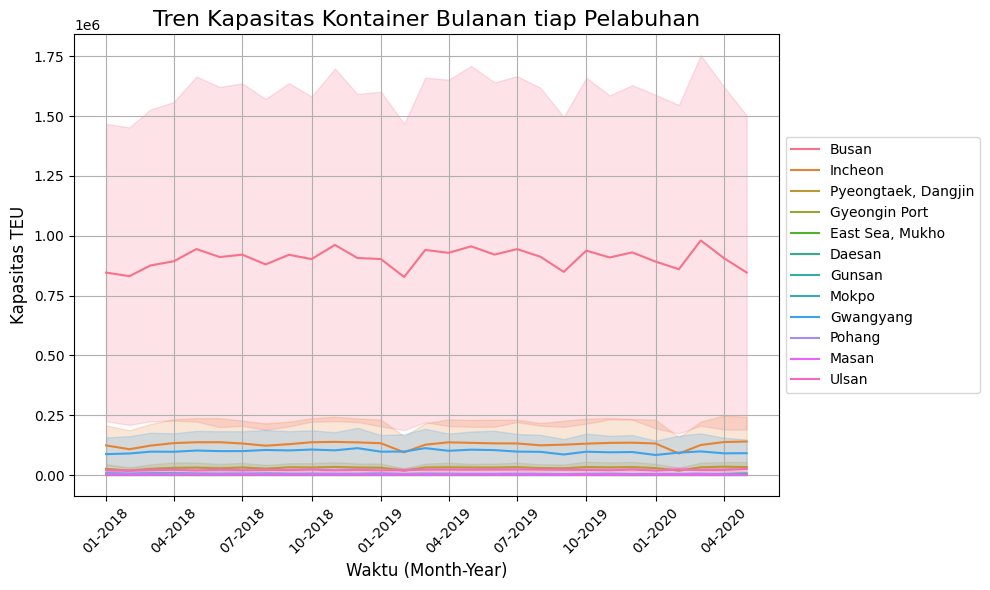

In [73]:
# Menambahkan kolom 'date' yang sudah dikonversi
transformed_data['date'] = pd.to_datetime(transformed_data[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(10, 6))  # Sesuaikan ukuran gambar
sns.lineplot(x=transformed_data["date"], y=transformed_data["Capacity"], hue=transformed_data["Port Name"])

# Memindahkan legend di luar plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mengatur sumbu X untuk menampilkan hanya Bulan-Tahun
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%Y'))

plt.title('Tren Kapasitas Kontainer Bulanan tiap Pelabuhan', fontsize=16)
plt.xlabel('Waktu (Month-Year)', fontsize=12)
plt.ylabel('Kapasitas TEU', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_capacity_trend.png')  # Simpan grafik sebagai file PNG
plt.show()

# 6. Simpan Hasil Analisis ke CSV

In [74]:
# Gabungkan highest_capacity dan average_capacity
with pd.ExcelWriter('port_analysis_results.xlsx') as writer:
    transformed_data.to_excel(writer, sheet_name='transformed_data', index=False)
    average_capacity.to_excel(writer, sheet_name='average_capacity', index=False)
    highest_capacity.to_excel(writer, sheet_name='highest_capacity', index=False)

print(f"Hasil analisis telah disimpan di {output_path}")

Hasil analisis telah disimpan di port_analysis_results.csv
